# Comprendre comment une API fonctionne grâce à Rick et Morty

Dans cet exercice, nous allons explorer un peu le travail du Data Engineer, qui peut être très utile pour un Data Analyst lorsqu'il lui manque quelques données importantes: aller récuperer des données grâce à une API. 
Pour cela, nous allons: 
- naviguer dans les données d'un site dédié à la célèbre série Rick & Morty
- créer des fonctions pour récuperer certaines données basiques (S01, 02 Python)
- nettoyer et transformer ces données en DataFrame (S04, S05, S06 Python) 

Pour cela, commencez par jeter un coup d'oeil à la [documentation de l'API](https://rickandmortyapi.com/documentation/) du site.

## Importation des packages 

Importer les modules suivants: 
- modules API: json, requests. 
- modules dataframes: pandas, numpy.
- module visualisation: seaborn, matplotlib;

*S'ils ne sont pas installés, pensez à !pip install*

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Créer une connexion au site

 1. Créez une variable 'baseurl' qui prend en entrée l'url de base de l'api du site: https://rickandmortyapi.com/api/ et une autre variable "endpoint" qui prend en entrée "character".

*Bonus: essayer de trouver les 3 endpoints possibles, décris dans la documentation de l'API*

In [1]:
baseurl = 'https://rickandmortyapi.com/api/'
endpoint = 'character'

> 3 endpoints: 'character', 'location', 'episodes'

2. Créez une requête `response` qui va requêter les informations grâce à la méthode get, via un lien qui sera composé de la baseurl et du endpoint.

*Hint: on peut additionner deux variables de même type ensemble pour les concatener*. 

*Le résultat doit vous afficher `<Response [200]>`*


In [4]:
response = requests.get(baseurl + endpoint)
response

<Response [200]>

3. Maintenant que la connexion est créée, vérifiez ce que l'on recoit lors de cette requête. Pour cela, il faut appliquer la méthode `.json()` à notre variable `response`.

In [5]:
response.json()

{'info': {'count': 826,
  'pages': 42,
  'next': 'https://rickandmortyapi.com/api/character?page=2',
  'prev': None},
 'results': [{'id': 1,
   'name': 'Rick Sanchez',
   'status': 'Alive',
   'species': 'Human',
   'type': '',
   'gender': 'Male',
   'origin': {'name': 'Earth (C-137)',
    'url': 'https://rickandmortyapi.com/api/location/1'},
   'location': {'name': 'Citadel of Ricks',
    'url': 'https://rickandmortyapi.com/api/location/3'},
   'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg',
   'episode': ['https://rickandmortyapi.com/api/episode/1',
    'https://rickandmortyapi.com/api/episode/2',
    'https://rickandmortyapi.com/api/episode/3',
    'https://rickandmortyapi.com/api/episode/4',
    'https://rickandmortyapi.com/api/episode/5',
    'https://rickandmortyapi.com/api/episode/6',
    'https://rickandmortyapi.com/api/episode/7',
    'https://rickandmortyapi.com/api/episode/8',
    'https://rickandmortyapi.com/api/episode/9',
    'https://rickandmortyapi.

In [6]:
# Stocker le résultat dans une variable intitulée 'data' et en afficher le type
data = response.json()
type(data)

dict

## Naviguer dans les informations récuperées

Commençons par naviguer dans le dictionnaire 'data'.

In [7]:
data.keys()

dict_keys(['info', 'results'])

Ce dictionnaire contient donc 2 couples clé-valeur. 

Investiguez le type de chacune des deux valeurs.

In [8]:
# Première clé-valeur
print(f"Type de data['info']: {type(data['info'])}")
data['info']

Type de data['info']: <class 'dict'>


{'count': 826,
 'pages': 42,
 'next': 'https://rickandmortyapi.com/api/character?page=2',
 'prev': None}

In [9]:
# Seconde clé-valeur
print(f"Type de data['results']: {type(data['results'])}")
data['results']

Type de data['results']: <class 'list'>


[{'id': 1,
  'name': 'Rick Sanchez',
  'status': 'Alive',
  'species': 'Human',
  'type': '',
  'gender': 'Male',
  'origin': {'name': 'Earth (C-137)',
   'url': 'https://rickandmortyapi.com/api/location/1'},
  'location': {'name': 'Citadel of Ricks',
   'url': 'https://rickandmortyapi.com/api/location/3'},
  'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg',
  'episode': ['https://rickandmortyapi.com/api/episode/1',
   'https://rickandmortyapi.com/api/episode/2',
   'https://rickandmortyapi.com/api/episode/3',
   'https://rickandmortyapi.com/api/episode/4',
   'https://rickandmortyapi.com/api/episode/5',
   'https://rickandmortyapi.com/api/episode/6',
   'https://rickandmortyapi.com/api/episode/7',
   'https://rickandmortyapi.com/api/episode/8',
   'https://rickandmortyapi.com/api/episode/9',
   'https://rickandmortyapi.com/api/episode/10',
   'https://rickandmortyapi.com/api/episode/11',
   'https://rickandmortyapi.com/api/episode/12',
   'https://rickandmortyapi.com

In [10]:
print(f"Il y a {len(data['results'])} éléments dans la liste data['results'].")

Il y a 20 éléments dans la liste data['results'].


4. À quoi correspond chacun des éléments de cette liste ?  

*Réponse : chaque élément est un dictionnaire qui correspond à un personnage.*

5. Affichez l'ensemble des attributs (les clés du dictionnaire) qui définissent le premier personnage.

In [11]:
print(data['results'][0].keys())

dict_keys(['id', 'name', 'status', 'species', 'type', 'gender', 'origin', 'location', 'image', 'episode', 'url', 'created'])


6. Vérifiez que tous les personnages ont les mêmes attributs.

In [16]:
data['results']

[{'id': 1,
  'name': 'Rick Sanchez',
  'status': 'Alive',
  'species': 'Human',
  'type': '',
  'gender': 'Male',
  'origin': {'name': 'Earth (C-137)',
   'url': 'https://rickandmortyapi.com/api/location/1'},
  'location': {'name': 'Citadel of Ricks',
   'url': 'https://rickandmortyapi.com/api/location/3'},
  'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg',
  'episode': ['https://rickandmortyapi.com/api/episode/1',
   'https://rickandmortyapi.com/api/episode/2',
   'https://rickandmortyapi.com/api/episode/3',
   'https://rickandmortyapi.com/api/episode/4',
   'https://rickandmortyapi.com/api/episode/5',
   'https://rickandmortyapi.com/api/episode/6',
   'https://rickandmortyapi.com/api/episode/7',
   'https://rickandmortyapi.com/api/episode/8',
   'https://rickandmortyapi.com/api/episode/9',
   'https://rickandmortyapi.com/api/episode/10',
   'https://rickandmortyapi.com/api/episode/11',
   'https://rickandmortyapi.com/api/episode/12',
   'https://rickandmortyapi.com

In [15]:
# On pourrait regarder si l'ensemble des personnages ont les mêmes clés valeurs
first_character_properties = data['results'][0].keys()

for character in data['results']:
    if character.keys() != first_character_properties:
        print(character.keys())

# Bien d'autres méthodes sont possibles

## Récupérer des données 

7. Quel est le nom du personnage ayant l'id 12 ? 

In [18]:
data['results'][11]['name']

'Alexander'

In [21]:
data['results'][11]['name']

'Alexander'

8. Dans combien d'épisode apparait le personnage ayant l'id 6? 

In [27]:
data['results'][5]['episode']

['https://rickandmortyapi.com/api/episode/27']

In [26]:
len(data['results'][5]['episode'])

1

9. Quelle est l'espèce du personnage ayant l'id 5 ? 

In [30]:
data['results'][4]['species']

'Human'

## Itérer grâce à une fonction pour récuperer des données

Commencons par comprendre comment une fonction peut être utilisée pour récuperer des données. 

10. Créez une fonction `get_nb_pages` qui prend en entrée un variable `data` et qui retourne le nombre de pages.

In [38]:
data['info']['pages']

42

In [39]:
def get_nb_pages(data): 
    return data['info']['pages']

In [40]:
get_nb_pages(data)

42

Maintenant, utilisons une fonction pour chercher une suite d'information d'un seul coup. 

11. Créez une fonction `display_names` qui va afficher le noms de tous les personnages. 

In [41]:
data['results']

[{'id': 1,
  'name': 'Rick Sanchez',
  'status': 'Alive',
  'species': 'Human',
  'type': '',
  'gender': 'Male',
  'origin': {'name': 'Earth (C-137)',
   'url': 'https://rickandmortyapi.com/api/location/1'},
  'location': {'name': 'Citadel of Ricks',
   'url': 'https://rickandmortyapi.com/api/location/3'},
  'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg',
  'episode': ['https://rickandmortyapi.com/api/episode/1',
   'https://rickandmortyapi.com/api/episode/2',
   'https://rickandmortyapi.com/api/episode/3',
   'https://rickandmortyapi.com/api/episode/4',
   'https://rickandmortyapi.com/api/episode/5',
   'https://rickandmortyapi.com/api/episode/6',
   'https://rickandmortyapi.com/api/episode/7',
   'https://rickandmortyapi.com/api/episode/8',
   'https://rickandmortyapi.com/api/episode/9',
   'https://rickandmortyapi.com/api/episode/10',
   'https://rickandmortyapi.com/api/episode/11',
   'https://rickandmortyapi.com/api/episode/12',
   'https://rickandmortyapi.com

In [42]:
def display_all_character_names(data): 
    for item in data['results']:
        print(item['name'])

In [44]:
type(display_all_character_names(data))

Rick Sanchez
Morty Smith
Summer Smith
Beth Smith
Jerry Smith
Abadango Cluster Princess
Abradolf Lincler
Adjudicator Rick
Agency Director
Alan Rails
Albert Einstein
Alexander
Alien Googah
Alien Morty
Alien Rick
Amish Cyborg
Annie
Antenna Morty
Antenna Rick
Ants in my Eyes Johnson


NoneType

12. Créez maintenant une fonction `get_names` qui va **retourner une liste contenant le nom de tous les personnages**.

In [45]:
def get_all_character_names(data):
    names = list()
    for item in data['results']:
        names.append(item['name'])
    return names

In [48]:
get_all_character_names(data)

['Rick Sanchez',
 'Morty Smith',
 'Summer Smith',
 'Beth Smith',
 'Jerry Smith',
 'Abadango Cluster Princess',
 'Abradolf Lincler',
 'Adjudicator Rick',
 'Agency Director',
 'Alan Rails',
 'Albert Einstein',
 'Alexander',
 'Alien Googah',
 'Alien Morty',
 'Alien Rick',
 'Amish Cyborg',
 'Annie',
 'Antenna Morty',
 'Antenna Rick',
 'Ants in my Eyes Johnson']

Utilisons maintenant une fonction pour afficher des informations utiles. 

13. Créez une fonction `display_nb_apparitions_by_character` qui affiche le nom de chaque personnage et le nombre d'épisodes dans lesquels il apparaît.

In [52]:
data['results']

[{'id': 1,
  'name': 'Rick Sanchez',
  'status': 'Alive',
  'species': 'Human',
  'type': '',
  'gender': 'Male',
  'origin': {'name': 'Earth (C-137)',
   'url': 'https://rickandmortyapi.com/api/location/1'},
  'location': {'name': 'Citadel of Ricks',
   'url': 'https://rickandmortyapi.com/api/location/3'},
  'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg',
  'episode': ['https://rickandmortyapi.com/api/episode/1',
   'https://rickandmortyapi.com/api/episode/2',
   'https://rickandmortyapi.com/api/episode/3',
   'https://rickandmortyapi.com/api/episode/4',
   'https://rickandmortyapi.com/api/episode/5',
   'https://rickandmortyapi.com/api/episode/6',
   'https://rickandmortyapi.com/api/episode/7',
   'https://rickandmortyapi.com/api/episode/8',
   'https://rickandmortyapi.com/api/episode/9',
   'https://rickandmortyapi.com/api/episode/10',
   'https://rickandmortyapi.com/api/episode/11',
   'https://rickandmortyapi.com/api/episode/12',
   'https://rickandmortyapi.com

In [49]:
def display_nb_apparitions_by_character(data):
    for item in data['results']:
        print(f"{item['name']}: {len(item['episode'])} épisodes") 

In [50]:
display_nb_apparitions_by_character(data)

Rick Sanchez: 51 épisodes
Morty Smith: 51 épisodes
Summer Smith: 42 épisodes
Beth Smith: 42 épisodes
Jerry Smith: 39 épisodes
Abadango Cluster Princess: 1 épisodes
Abradolf Lincler: 2 épisodes
Adjudicator Rick: 1 épisodes
Agency Director: 1 épisodes
Alan Rails: 1 épisodes
Albert Einstein: 1 épisodes
Alexander: 1 épisodes
Alien Googah: 1 épisodes
Alien Morty: 1 épisodes
Alien Rick: 1 épisodes
Amish Cyborg: 1 épisodes
Annie: 1 épisodes
Antenna Morty: 2 épisodes
Antenna Rick: 1 épisodes
Ants in my Eyes Johnson: 1 épisodes


## Récupérer des données exploitables

14. Vérifiez le type de l'output de la fonction `display_nb_apparitions_by_character`. Que remarquez-vous ? 

In [51]:
type(display_nb_apparitions_by_character(data))

Rick Sanchez: 51 épisodes
Morty Smith: 51 épisodes
Summer Smith: 42 épisodes
Beth Smith: 42 épisodes
Jerry Smith: 39 épisodes
Abadango Cluster Princess: 1 épisodes
Abradolf Lincler: 2 épisodes
Adjudicator Rick: 1 épisodes
Agency Director: 1 épisodes
Alan Rails: 1 épisodes
Albert Einstein: 1 épisodes
Alexander: 1 épisodes
Alien Googah: 1 épisodes
Alien Morty: 1 épisodes
Alien Rick: 1 épisodes
Amish Cyborg: 1 épisodes
Annie: 1 épisodes
Antenna Morty: 2 épisodes
Antenna Rick: 1 épisodes
Ants in my Eyes Johnson: 1 épisodes


NoneType

15. Modifiez la fonction `display_nb_apparitions_by_character()` afin qu'elle retourne une liste de 20 dictionnaires (un pour chaque personnage).  

*Hint: Chaque dictionnaire devrait contenir 3 clés : `id`, `name` et `nb_episodes`. 
Nommer cette nouvelle fonction `get_nb_apparitions_by_character()`.*

In [53]:
def get_nb_apparitions_by_character(data):
    characters = []
    for item in data['results']:
        perso = {
            'id': item['id'],
            'name': item['name'], 
            'nb_episodes': len(item['episode'])
        }
        characters.append(perso)
    return characters

In [54]:
character_apparitions = get_nb_apparitions_by_character(data)
character_apparitions

[{'id': 1, 'name': 'Rick Sanchez', 'nb_episodes': 51},
 {'id': 2, 'name': 'Morty Smith', 'nb_episodes': 51},
 {'id': 3, 'name': 'Summer Smith', 'nb_episodes': 42},
 {'id': 4, 'name': 'Beth Smith', 'nb_episodes': 42},
 {'id': 5, 'name': 'Jerry Smith', 'nb_episodes': 39},
 {'id': 6, 'name': 'Abadango Cluster Princess', 'nb_episodes': 1},
 {'id': 7, 'name': 'Abradolf Lincler', 'nb_episodes': 2},
 {'id': 8, 'name': 'Adjudicator Rick', 'nb_episodes': 1},
 {'id': 9, 'name': 'Agency Director', 'nb_episodes': 1},
 {'id': 10, 'name': 'Alan Rails', 'nb_episodes': 1},
 {'id': 11, 'name': 'Albert Einstein', 'nb_episodes': 1},
 {'id': 12, 'name': 'Alexander', 'nb_episodes': 1},
 {'id': 13, 'name': 'Alien Googah', 'nb_episodes': 1},
 {'id': 14, 'name': 'Alien Morty', 'nb_episodes': 1},
 {'id': 15, 'name': 'Alien Rick', 'nb_episodes': 1},
 {'id': 16, 'name': 'Amish Cyborg', 'nb_episodes': 1},
 {'id': 17, 'name': 'Annie', 'nb_episodes': 1},
 {'id': 18, 'name': 'Antenna Morty', 'nb_episodes': 2},
 {'id

16. Transformez le dictionnaire en dataframe.

In [63]:
df_characters = pd.DataFrame(character_apparitions)
df_characters

,id,name,nb_episodes
0,1,Rick Sanchez,51
1,2,Morty Smith,51
2,3,Summer Smith,42
3,4,Beth Smith,42
4,5,Jerry Smith,39
5,6,Abadango Cluster Princess,1
6,7,Abradolf Lincler,2
7,8,Adjudicator Rick,1
8,9,Agency Director,1
9,10,Alan Rails,1


## Bonus: Trouver plus de données

16. *bis* De la même manière que l'on a trouvé le nom de chaque personnage et le nombre de fois où il apparaît dans un épisode, trouvez la planete associée à chaque id de personnage puis créez un DataFrame avec l'id du personnage et la planète associée, sur laquelle il habite.
Enfin, joindre les deux DataFrames ensemble.

In [65]:
def get_character_planet(data):
    planets = []
    for item in data['results']:
        planet = {
            'id': item['id'],
            'planet': item['origin']['name']
        }
        planets.append(planet)
    return planets

In [66]:
planets = get_character_planet(data)
planets

[{'id': 1, 'planet': 'Earth (C-137)'},
 {'id': 2, 'planet': 'unknown'},
 {'id': 3, 'planet': 'Earth (Replacement Dimension)'},
 {'id': 4, 'planet': 'Earth (Replacement Dimension)'},
 {'id': 5, 'planet': 'Earth (Replacement Dimension)'},
 {'id': 6, 'planet': 'Abadango'},
 {'id': 7, 'planet': 'Earth (Replacement Dimension)'},
 {'id': 8, 'planet': 'unknown'},
 {'id': 9, 'planet': 'Earth (Replacement Dimension)'},
 {'id': 10, 'planet': 'unknown'},
 {'id': 11, 'planet': 'Earth (C-137)'},
 {'id': 12, 'planet': 'Earth (C-137)'},
 {'id': 13, 'planet': 'unknown'},
 {'id': 14, 'planet': 'unknown'},
 {'id': 15, 'planet': 'unknown'},
 {'id': 16, 'planet': 'unknown'},
 {'id': 17, 'planet': 'Earth (C-137)'},
 {'id': 18, 'planet': 'unknown'},
 {'id': 19, 'planet': 'unknown'},
 {'id': 20, 'planet': 'unknown'}]

In [68]:
df_planets = pd.DataFrame(planets)
df_planets

,id,planet
0,1,Earth (C-137)
1,2,unknown
2,3,Earth (Replacement Dimension)
3,4,Earth (Replacement Dimension)
4,5,Earth (Replacement Dimension)
5,6,Abadango
6,7,Earth (Replacement Dimension)
7,8,unknown
8,9,Earth (Replacement Dimension)
9,10,unknown


In [69]:
df_final = df_characters.merge(df_planets, how = 'inner', on = 'id') 
df_final

,id,name,nb_episodes,planet
0,1,Rick Sanchez,51,Earth (C-137)
1,2,Morty Smith,51,unknown
2,3,Summer Smith,42,Earth (Replacement Dimension)
3,4,Beth Smith,42,Earth (Replacement Dimension)
4,5,Jerry Smith,39,Earth (Replacement Dimension)
5,6,Abadango Cluster Princess,1,Abadango
6,7,Abradolf Lincler,2,Earth (Replacement Dimension)
7,8,Adjudicator Rick,1,unknown
8,9,Agency Director,1,Earth (Replacement Dimension)
9,10,Alan Rails,1,unknown


## Explorer les données

16. *ter* Si vous avez fait le bonus, nettoyez les noms de planète.

In [33]:
df_final.replace('unknown', np.nan)

,id,name,nb_episodes,planet
0,1,Rick Sanchez,51,Earth (C-137)
1,2,Morty Smith,51,NaN
2,3,Summer Smith,42,Earth (Replacement Dimension)
3,4,Beth Smith,42,Earth (Replacement Dimension)
4,5,Jerry Smith,39,Earth (Replacement Dimension)
5,6,Abadango Cluster Princess,1,Abadango
6,7,Abradolf Lincler,2,Earth (Replacement Dimension)
7,8,Adjudicator Rick,1,NaN
8,9,Agency Director,1,Earth (Replacement Dimension)
9,10,Alan Rails,1,NaN


17. Affichez un barplot du nombre d'épisodes dans lequel appraissent chaque personnage

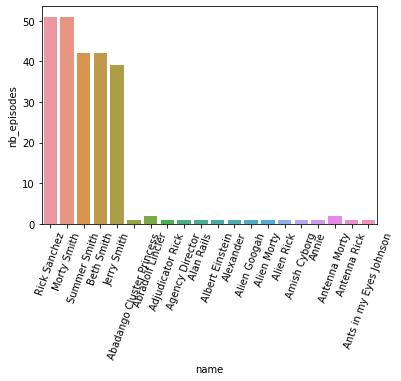

In [71]:
sns.barplot(data = df_final, x = 'name', y = 'nb_episodes')
plt.xticks(rotation=70);

18. Faire un boxplot du nombre d'épisode dans lesquels apparaissent les différents personnages. 
Que peut-on en conclure? 

<AxesSubplot:xlabel='nb_episodes'>

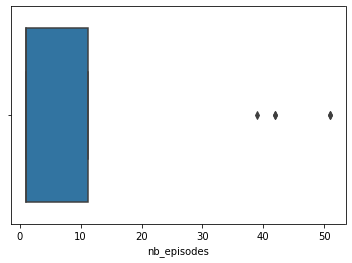

In [72]:
sns.boxplot(data = df_final, x = 'nb_episodes')

Proposition d'analyse: On remarque quelques outliers, qui semblent être les personnages principaux, qui apparaissent dans la plupart des épisodes.    
Si nous avions d'autres données, il serait intéressant de ne pas omettre les outliers dans ce cas précis, contrairement à ce que l'on pourrait faire dans d'autres analyses. 

## Bonus: Libre à vous de conduire une analyse sur les planètes, ou autre, en récuperant d'autres données ! 

### Bonus ++ (bravo si vous êtes arrivé jusque là!) : rdv sur le notion pour commencer le Case API Twitter 